# Análisis de Datos con Python


## Carga de datos

Importar la librería de Python, `Pandas`:


In [391]:
import pandas as pd

Cargar el archivo CSV con los datos


In [392]:
dataFrame = pd.read_csv('archivos_entrada/datos.csv')

Imprimir los primeros (5) valores del archivo CSV cargado. Se puede definir cuantas filas mostrar con `dataFrame.head(3)` a partir del inicio, o al final del archivo `dataFrame.tail(2)`.


In [393]:
dataFrame.head()

,Course Title,Rating,Level,Duration,Schedule,Review,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url
0,Fashion as Design,4.8,Beginner level,20 hours (approximately),Flexible schedule,"2,813 reviews",NaN,"['Art History', 'Art', 'History', 'Creativity']","['Introduction', 'Heroes', 'Silhouettes', 'Cou...","['Anna Burckhardt', 'Paola Antonelli', 'Michel...",['The Museum of Modern Art'],Arts and Humanities,https://www.coursera.org/learn/fashion-design
1,Modern American Poetry,4.4,Beginner level,Approx. 34 hours to complete,Flexible schedule,100 reviews,NaN,[],"['Orientation', 'Module 1', 'Module 2', 'Modul...",['Cary Nelson'],['University of Illinois at Urbana-Champaign'],Arts and Humanities,https://www.coursera.org/learn/modern-american...
2,Pixel Art for Video Games,4.5,Beginner level,9 hours (approximately),Flexible schedule,227 reviews,NaN,[],"['Week 1: Introduction to Pixel Art', 'Week 2:...","['Andrew Dennis', 'Ricardo Guimaraes']",['Michigan State University'],Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...
3,Distribución digital de la música independiente,NaN,Beginner level,Approx. 8 hours to complete,Flexible schedule,NaN,NaN,[],"['Semana 1', 'Semana 2', 'Semana 3', 'Semana 4']",['Eduardo de la Vara Brown.'],['SAE Institute México'],Arts and Humanities,https://www.coursera.org/learn/distribucion-di...
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Approx. 11 hours to complete,Flexible schedule,582 reviews,Students will be able to describe the blues as...,"['Music', 'Chord', 'Jazz', 'Jazz Improvisation']","['Blues Progressions – Theory and Practice ', ...",['Dariusz Terefenko'],['University of Rochester'],Arts and Humanities,https://www.coursera.org/learn/the-blues


Imprimir la cantidad de registros que ha leído del archivo CSV


In [394]:
print(f"Filas: {len(dataFrame)}")

Filas: 9595


## Limpieza de datos

Ahora procedemos a hacer limpieza de datos.
Lo primero será buscar los valores `NaN` dentro del archivo, para esto se utilizarán las funciones `isna()` y `sum()` que nos de devolverán los totales de cada columna


In [395]:
dataFrame.isna().sum()

Course Title              0
Rating                 1439
Level                  1265
Duration                262
Schedule                683
Review                 1443
What you will learn    4611
Skill gain                0
Modules                   0
Instructor                0
Offered By                0
Keyword                   0
Course Url                0
dtype: int64

### Rating

Según la tabla anterior, el 15% (1439 filas) de los valores de `Rating` son `NaN` por lo que colocarles un valor de _cero_ podría romper la tendencia o distorcionar los cálculos, se optará por rellenar esos datos con la **`media`** de la columna.


In [396]:
mean_rating = round(dataFrame['Rating'].mean(), 2)
dataFrame['Rating'] = dataFrame['Rating'].fillna(mean_rating)

Ahora se podrá visualizar una nueva fila con `Rating` igual a la `media` de los valores.


In [397]:
dataFrame['Rating'].value_counts()

Rating
4.80    2180
4.70    2083
4.65    1439
4.60    1250
4.90     823
4.50     742
4.40     362
4.30     206
4.20     146
4.10      86
5.00      75
3.90      45
4.00      44
3.80      28
3.30      16
3.70      15
3.40      12
3.60      10
3.50       9
3.10       8
3.20       7
3.00       3
1.50       3
2.50       3
Name: count, dtype: int64

### Level

Se colocarán como "Indefinidos" (Undefined) los cursos que no posean nivel (Level)

In [398]:
dataFrame['Level'] = dataFrame['Level'].fillna('Undefined')

Visualizar el listado de valores de la columna `Level`

In [399]:
dataFrame['Level'].value_counts()

Level
Beginner level        5689
Intermediate level    2360
Undefined             1265
Advanced level         281
Name: count, dtype: int64

### Duration

In [400]:
dataFrame['Duration'] = dataFrame['Duration'].str.replace(',', '')
dataFrame['Duration'] = dataFrame['Duration'].str.replace('.', '')
dataFrame['Duration'] = dataFrame['Duration'].str.replace('(', '')
dataFrame['Duration'] = dataFrame['Duration'].str.replace(')', '')
dataFrame['Duration'] = dataFrame['Duration'].str.extract('(\d+)')
dataFrame['Duration'] = dataFrame['Duration'].fillna(0)

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_5585/661280765.py:5: SyntaxWarning: invalid escape sequence '\d'
  dataFrame['Duration'] = dataFrame['Duration'].str.extract('(\d+)')


### Review

In [401]:
dataFrame['Review'] = dataFrame['Review'].str.replace(',', '')
dataFrame['Review'] = dataFrame['Review'].str.extract('(^\d*)')
dataFrame['Review'] = dataFrame['Review'].fillna(0)


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_5585/231261469.py:2: SyntaxWarning: invalid escape sequence '\d'
  dataFrame['Review'] = dataFrame['Review'].str.extract('(^\d*)')


## Cálculos

Ahora se mostrarán algunos cálculos sobre los datos limpios


### 1. Promedio de calificación por curso


In [402]:
dataFrame.groupby('Course Title')['Rating'].mean()

Course Title
 Assisting Public Sector Decision Makers With Policy Analysis                                                          4.80
 Atención prehospitalaria del ictus agudo y selección de pacientes para tratamiento endovascular con la escala RACE    4.90
 Build a social media presence for your business using Canva                                                           4.70
 Build social awareness content for Twitter with Canva                                                                 4.65
 Comercio, Inmigración y Tipos de Cambio en un Mundo Globalizado                                                       4.90
                                                                                                                       ... 
현대 로봇공학, 강좌 2: 로봇 기구학                                                                                                  4.65
현대 로봇공학, 강좌 3: 로봇 동역학                                                                                                  

**Conclusión:** Se puede visualizar en en la gran mayoría de cursos los estudiantes dan una calificación superior a 4.5 lo cual significa un 90% de aprobación

### 2. Cursos con mayor y menor rating


In [403]:
sorted_rating = dataFrame.sort_values('Rating')

sorted_rating.iloc[[-1, 0]]


,Course Title,Rating,Level,Duration,Schedule,Review,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url
4092,Compromiso del paciente: resultados clínicos s...,5.0,Beginner level,2,Flexible schedule,5,NaN,"['Colaboración', 'Toma de decisiones', 'Gestió...","['Atención centrada en el paciente', 'Calidad ...","['Efrain Navarro Olivos', 'Manuel Pérez Jiméne...",['Tecnológico de Monterrey'],Health,https://www.coursera.org/specializations/compr...
5151,Build a computer vision app with Azure Cogniti...,1.5,Intermediate level,0,NaN,129,Create a Computer Vision Cognitive Services re...,"['Artificial Intelligence (AI)', 'Software Dev...",['Learn step-by-step'],['Catalin Popa'],['Microsoft'],Information Technology,https://www.coursera.org/projects/build-a-comp...


### 3. Porcentaje de cursos con horario flexible


In [404]:
flexible_schedule = len(dataFrame[dataFrame['Schedule'] == "Flexible schedule"])
total_schedule = len(dataFrame['Schedule'])

round((flexible_schedule / total_schedule) * 100, 2)

92.88

### Conclusión

**NumPy** proporciona estructuras de datos eficientes como arrays y matrices, permitiendo realizar cálculos numéricos rápidos y optimizados, esenciales para manejar grandes cantidades de datos. **Pandas**, por su parte, ofrece estructuras como **DataFrames** y **Series** que simplifican la manipulación y análisis de datos estructurados, facilitando tareas como filtrado y agrupación. Ambas bibliotecas son complementarias y fundamentales para el análisis de datos en Python.

## Análisis de texto

### Leer el archivo

In [405]:
coursera_comments_file = open('archivos_entrada/Coursera Comments.txt')

coursera_comments = coursera_comments_file.read()

### NLTK

Instalar la librería `NLTK` con `pip`

In [406]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Comprobar la versión instalada

In [407]:
import nltk
nltk.__version__

'3.9.1'

Descarga de archivos necesarios para el análisis

In [408]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt_tab to /home/feli/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/feli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/feli/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/feli/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/feli/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/feli/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/feli/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Dow

True

### Tokenización

Es el proceso de dividir un texto en unidades más pequeñas llamadas tokens (pueden ser palabras, frases o caracteres). Es el primer paso en el procesamiento de texto para analizar cada token de forma individual.

Importación de las librerías `word_tokenize`, `sent_tokenize`

In [409]:
from nltk.tokenize import word_tokenize, sent_tokenize

Hacer tokenizado de palabras

In [410]:
#print(sent_tokenize(sentence))
word_tokenize_result = word_tokenize(coursera_comments)
f = open("archivos_entrada/word_tokenize.json", "w")
f.write(str(word_tokenize_result))
f.close()

Hacer tokenizado de oraciones

In [411]:
sent_tokenize_result = sent_tokenize(coursera_comments)
f = open("archivos_entrada/sent_tokenize.json", "w")
f.write(str(sent_tokenize_result))
f.close()

### Palabras vacías (stopwords)

Las **palabras vacías** (o stop words) son aquellas que no añaden valor al análisis (por ejemplo: "el", "la", "y", "pero"). Eliminarlas ayuda a enfocarse en las palabras más importantes.

Importación de la librería `stopwords`

In [412]:
from nltk.corpus import stopwords

In [413]:
stop_words = set(stopwords.words('spanish'))

without_stopwords_tokens = [word for word in word_tokenize_result if word.lower() not in stop_words]

### Lematización y Stemming

Importación de las librerías `WordNetLemmatizer`, `PorterStemmer`

In [414]:
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer

#### Lematización
Es el proceso de reducir una palabra a su forma base o lema, teniendo en cuenta su contexto gramatical.

In [415]:
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(w) for w in without_stopwords_tokens]

#### Stemming

Reduce una palabra a su raíz básica sin tener en cuenta el contexto.

In [416]:
stemmer = SnowballStemmer('spanish')
stemmed_tokens = [stemmer.stem(word) for word in without_stopwords_tokens]

### Frecuencia de palabras

El análisis de la frecuencia de palabras permite contar cuántas veces aparece cada palabra en un texto. Esto es útil para identificar los términos más relevantes.

Importación de la librería `FreqDist`

In [479]:
from nltk.probability import FreqDist

In [480]:
frequency_words = FreqDist(without_stopwords_tokens)
frequency_words

FreqDist({',': 6799, '.': 6702, 'curso': 1297, ':': 887, '“': 869, '”': 869, 'Semana': 843, '-': 839, 'TA': 835, 'participantes': 822, ...})

### Análisis de sentimientos

El análisis de sentimientos evalúa el tono emocional de un texto (positivo, negativo o neutral). Para esto se utilizan librerías pre-entrenadas.

Importación de la librería `SentimentIntensityAnalyzer`

In [419]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [420]:
sentiment_analyzer = SentimentIntensityAnalyzer()
sentiments = sentiment_analyzer.polarity_scores(coursera_comments)
sentiments

{'neg': 0.035, 'neu': 0.954, 'pos': 0.011, 'compound': -1.0}

### Reconocimiento de Entidades Nombradas (NER)

El Reconocimiento de Entidades Nombradas (NER) es el proceso de identificar entidades como personas, organizaciones, lugares, etc., en un texto.

Importar las librerías

In [421]:
from nltk import ne_chunk, pos_tag

Etiquetado de palabras

In [422]:
#tokens_pos = pos_tag([without_stopwords_tokens])
#without_stopwords_tokens

In [423]:
#entidades = ne_chunk(tokens_pos)
#entidades

### Extracción de Entidades

La extracción de entidades es un paso adicional al NER, donde se extraen las entidades identificadas para su posterior análisis.

In [424]:
# Función para extraer entidades nombradas
'''def extraer_entidades(tree):
    entidades = []
    for subtree in tree:
        if hasattr(subtree, 'label') and subtree.label:
            entidad = ' '.join([hijo[0] for hijo in subtree.leaves()])
            entidades.append(entidad)
    return entidades

entidades_extraidas = extraer_entidades(entidades)
print(entidades_extraidas)
'''


"def extraer_entidades(tree):\n    entidades = []\n    for subtree in tree:\n        if hasattr(subtree, 'label') and subtree.label:\n            entidad = ' '.join([hijo[0] for hijo in subtree.leaves()])\n            entidades.append(entidad)\n    return entidades\n\nentidades_extraidas = extraer_entidades(entidades)\nprint(entidades_extraidas)\n"

### Conclusión

Cada una de estas técnicas es esencial en el análisis de datos textuales. A través de la tokenización, se puede dividir un texto en sus componentes básicos; con la lematización y stemming, se pueden reducir las palabras a su forma raíz; la eliminación de palabras vacías elimina el ruido en los datos; la frecuencia de palabras revela patrones importantes; el análisis de sentimientos evalúa emociones en el texto; y con el reconocimiento y extracción de entidades, se pueden identificar elementos clave como nombres de personas o lugares.

## Gráficos

In [425]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [426]:
import matplotlib.pyplot as plt
import numpy as np

### Cursos por nivel de dificultad

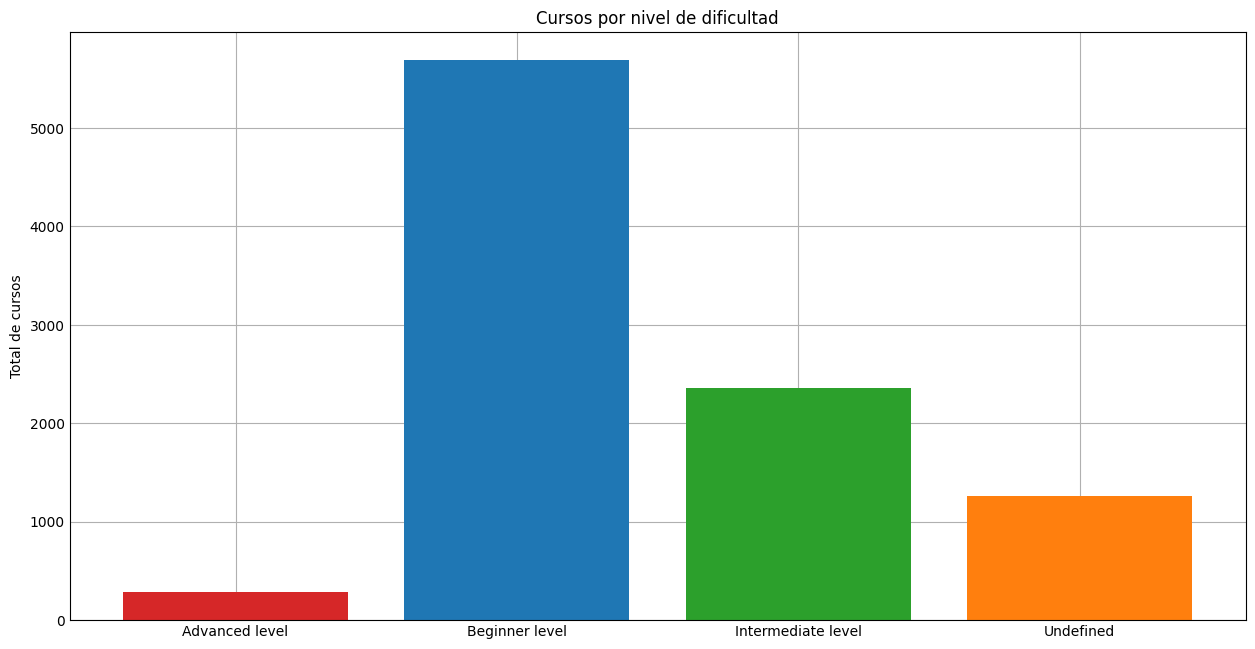

In [427]:
#dataFrame.head()
#dataFrame.groupby('Level')['Course title'].sum()
#dataFrame['Level'].isna().sum()
#dataFrame['Level'].value_counts()

courses_by_level = dataFrame.groupby('Level')['Course Title'].count().reset_index(name='total')
#courses_by_level
#pd.DataFrame(courses_by_level)

#courses_by_level.plot(x='Level', y='total', figsize=(12,4))

fig, ax = plt.subplots(figsize=(12, 6))

bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(courses_by_level['Level'], courses_by_level['total'], color=bar_colors)

ax.set_ylabel("Total de cursos")
ax.set_title("Cursos por nivel de dificultad")

plt.show()


#### Conclusión

Se puede visualizar que la mayoría de cursos de la plataforma son de nivel inicial, es decir, estos cursos son para introducir al estudiante a cada tema pero no para darle conocimiento profundo.

### Cursos principales por categoría

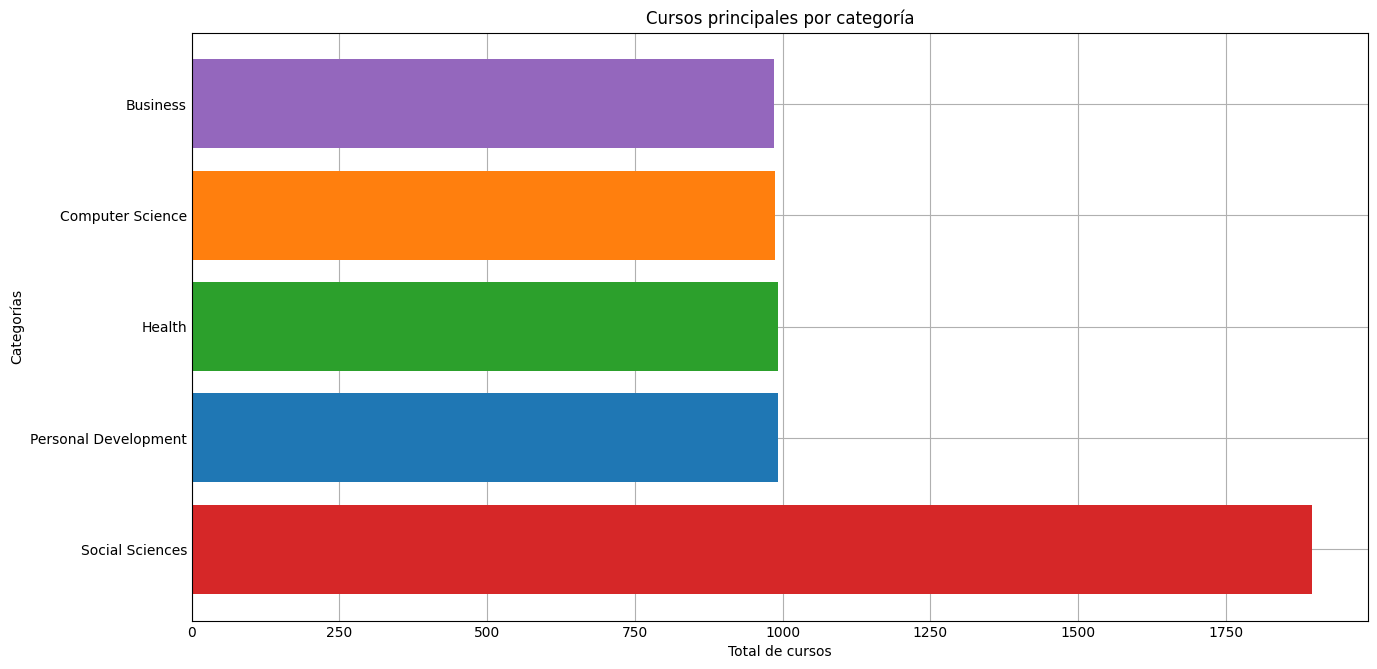

In [428]:
#dataFrame.groupby('Keyword')['Course Title'].count().head(5)#.plot(y='Keyword', figsize=(12,4))
#courses_by_category = dataFrame.groupby('Keyword')['Course Title'].count()
courses_by_category = dataFrame.groupby('Keyword')['Course Title'].count().reset_index(name='total')
#courses_by_category.sort_values('Course Title')
#pd.DataFrame(courses_by_category)
#courses_by_category.to_frame()
courses_by_category = courses_by_category.sort_values('total', ascending=False).head(5)

fig, ax = plt.subplots(figsize=(12, 6))

bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple']

ax.barh(courses_by_category['Keyword'], courses_by_category['total'], color=bar_colors)

ax.set_ylabel("Categorías")
ax.set_xlabel("Total de cursos")
ax.set_title("Cursos principales por categoría")

plt.show()


### Duración del curso vs número de revisiones

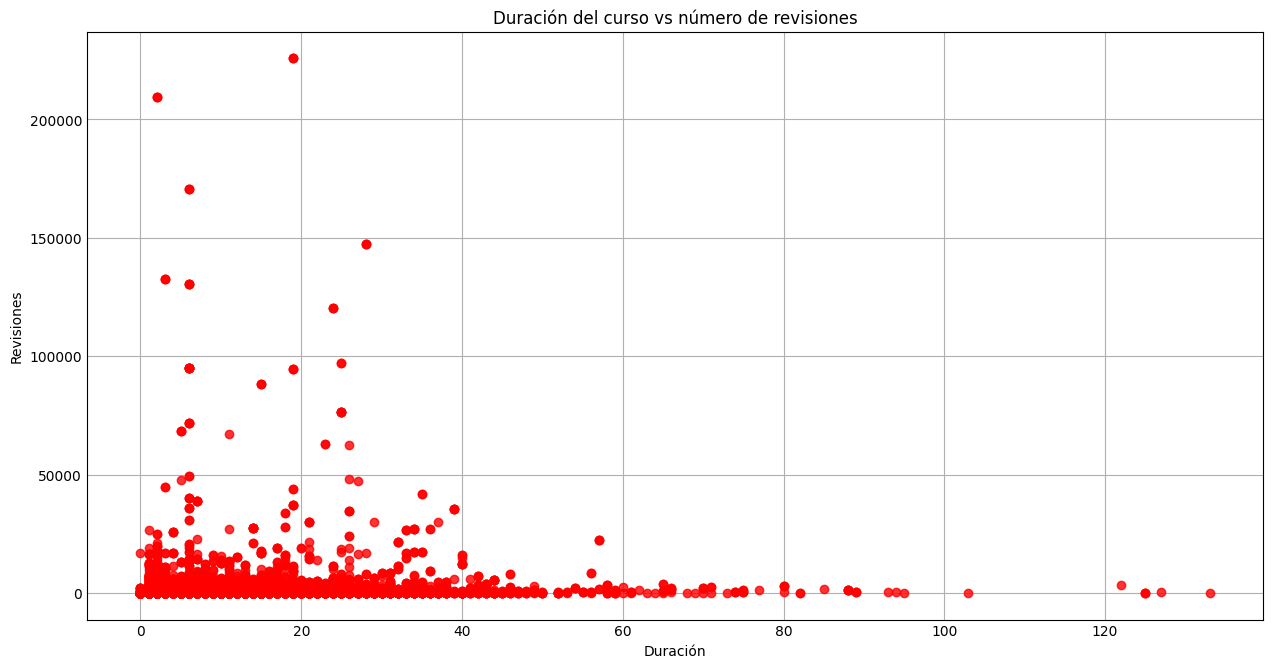

In [473]:
duration = dataFrame['Duration'].astype(float)
review = dataFrame['Review'].astype(float)
N = 50
colors = np.random.rand(N)

plt.figure(figsize=(12,6))
plt.title('Duración del curso vs número de revisiones')
plt.xlabel('Duración')
plt.ylabel('Revisiones')
plt.scatter(duration, review, color='red', alpha=0.8)

### Distribución de las duraciones de los cursos

(array([5.675e+03, 2.936e+03, 7.010e+02, 1.880e+02, 5.100e+01, 1.900e+01,
        1.600e+01, 3.000e+00, 0.000e+00, 6.000e+00]),
 array([  0. ,  13.3,  26.6,  39.9,  53.2,  66.5,  79.8,  93.1, 106.4,
        119.7, 133. ]),
 <BarContainer object of 10 artists>)

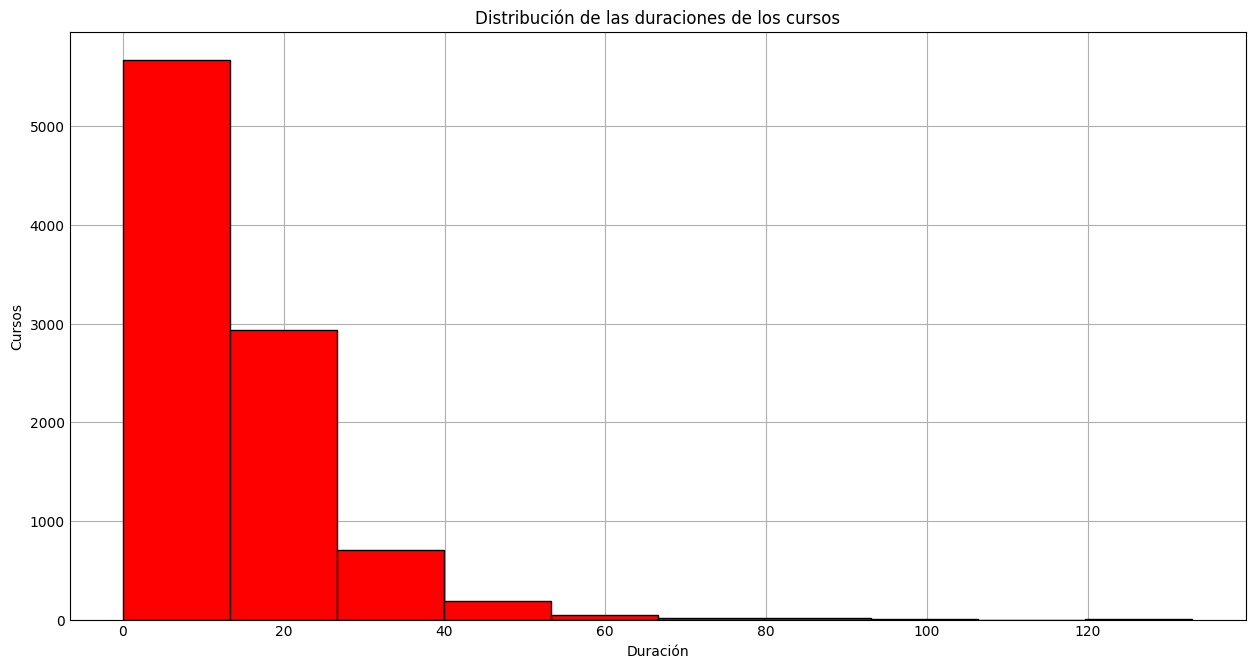

In [478]:
n_bins = 10

duration = dataFrame['Duration'].astype(float)

plt.figure(figsize=(12,6))
plt.title('Distribución de las duraciones de los cursos')
plt.xlabel('Duración')
plt.ylabel('Cursos')
plt.hist(duration, n_bins, color='red', edgecolor='black')

### Distribución de las calificaciones de los cursos por nivel de dificultad

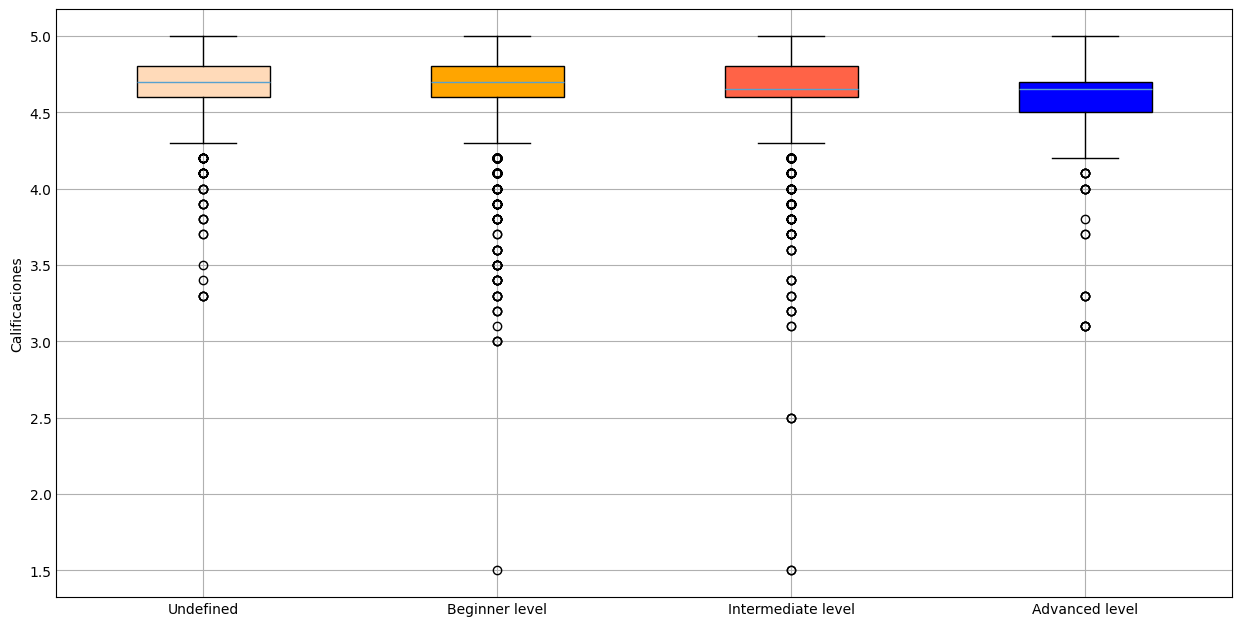

In [374]:
np.random.seed(19680801)
fruit_weights = [
    np.random.normal(130, 10, size=100),
    np.random.normal(125, 20, size=100),
    np.random.normal(120, 30, size=100),
]
arr2 = [
    dataFrame[dataFrame['Level'] == 'Undefined']['Rating'],
    dataFrame[dataFrame['Level'] == 'Beginner level']['Rating'],
    dataFrame[dataFrame['Level'] == 'Intermediate level']['Rating'],
    dataFrame[dataFrame['Level'] == 'Advanced level']['Rating']
]
#print(arr2)
labels = ['Undefined', 'Beginner level', 'Intermediate level', 'Advanced level']
colors = ['peachpuff', 'orange', 'tomato', 'blue']

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_ylabel('Calificaciones')

bplot = ax.boxplot(arr2,
                   patch_artist=True,  # fill with color
                   tick_labels=labels)  # will be used to label x-ticks

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()